# Pytorch 사용 예제

## Pytorch  2가지 주요 특징
 ### *Numpy와 유사하지만 GPU 상에서 실행 가능한 N차원 Tensor
 ### *신경망을 구성하고 학습하는 과정에서의 자동미분
 
 #### 완전히 연결된 ReLU 신경망을 예제로 사용
 #### 이 신경망은 하나의 은닉층(Hidden Layer)을 갖고 있으며, 
 ##### 신경망의 출력과 정답 사이의 유클리드 거리(Euclidean distance)를 최소화하는 식으로 경사하강법(gradient descent)을 사용하여 무작위의 데이터를 맞추도록 학습할것이다
 
 
 
 
 
 ReLU - > 활성화 함수의 한 종류 값이 0보다 작으면 0으로 0보다 크면 원래의 값을 줌
 
 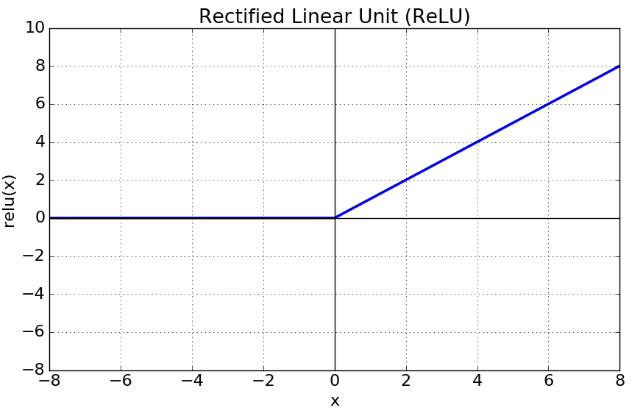
 
 

 

## 단축키

셀 추가하기

- 현재 셀 위에 추가: (command 모드) a

- 현재 셀 아래 추가: (command 모드) b

 

셀 삭제하기

- 현재 셀 삭제: (command 모드) dd

- 셀 제거 취소하기: (command 모드) z

 

셀 복사하기

- 현재 셀 복사: (command 모드) c

 

셀 붙여넣기

- 현재 셀 위에 붙여 넣기: (command 모드) Shift + v

- 현재 셀 아래 붙여 넣기: (command 모드) v

 

셀 이동시키기

- 위아래 버튼을 클릭해서 현재 셀을 이동시킬 수 있습니다.

In [65]:

import numpy as np

# N은 배치 크기이며, D_in은 입력의 차원입니다;
# H는 은닉층의 차원이며, D_out은 출력 차원입니다.
N, D_in, H, D_out = 64, 1000, 100, 10


# Gradient Descent를 실행하고 모델의 가중치를 갱신할때 고려할 데이터의 갯수다.
# 배치 크기가 1이라면 Stochastic Gradient Descent가 된다. 훈련이 느리다.
# 배치 크기가 데이터 전부의 갯수라면 Batch Mode가 된다. 계산량이 많다.
# 배치 크기가 그 사이라면, Mini-Batch Mode가 되며, 좋은 GPU의 사용이 가능하다면 각각의 데이터마다 동시에 병렬 계산이 되기 때문에 제일 빠른 수렴이 가능하다.
# 배치 크기는 GPU에 따라 64, 128, 256, 512.. 등으로 설정한다.
# Iteration * Batch Size = Epoch 이므로, 한 데이터셋을 도는데 최대한 병렬처리가 가능하게끔 배치 크기를 주는게 이득이다.

# 무작위의 입력과 출력 데이터를 생성합니다.
x = np.random.randn(N, D_in)                 # 64행 * 1000열의 행렬 생성 후 randn -> 평균 : 0, 표준편차 : 1 의 가우시안분포를 가진 수로 초기화 
y = np.random.randn(N, D_out)                # 64행 * 10열 행렬 생성 후 초기화  

# 무작위로 가중치를 초기화합니다.
w1 = np.random.randn(D_in, H)                # 1000행 * 100열의 행렬 생성 후 초기화
w2 = np.random.randn(H, D_out)               # 100행 * 10열의 행렬 생성 후 초기화


learning_rate = 1e-6  #(0.000001)  # 아래 그림 참조          


"""

test1 =np.random.rand(3,5);
test2 = np.random.rand(5,2);

.dot => 행렬 곱 함수

result= test1.dot(test2);
print(result)

"""

for t in range(300):
    # 순전파 단계: 예측값 y를 계산합니다.
    h = x.dot(w1)                                         # 입력데이터(64*1000) * 가중치w1(1000*100) 행렬 곱
    h_relu = np.maximum(h, 0)                             # numpy.maximum()함수 : 두 배열 사이의 최대값인 배열을 반환 -> 0인 배열과 비교하였기 때문에 0보다 낮은 값들은 0으로 변환
                                                          # (64,100) * (1000,100) -> shape = (64,100)
    
    y_pred = h_relu.dot(w2)                               # (64,100)*(100,10) -> shape = (64,10)

    # 손실(loss)을 계산하고 출력합니다.
    loss = np.square(y_pred - y).sum()                    
    print(t, loss)

    # 손실에 따른 w1, w2의 변화도를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # 가중치를 갱신합니다.
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2


0 33216657.175556198
1 30158648.61063155
2 31136253.605180252
3 30852621.17083256
4 26152643.304088518
5 18158367.291004404
6 10548547.093142416
7 5598461.030969614
8 3011709.0736592803
9 1777402.7591226313
10 1181173.7561392596
11 868166.9777018593
12 682803.3193293866
13 559161.0395666702
14 468714.63156963035
15 398403.1016399074
16 341777.7545712687
17 295159.90173164185
18 256242.02587018788
19 223449.34806450177
20 195619.73092070792
21 171873.93379602866
22 151553.97745174333
23 134037.39952096227
24 118892.52435367586
25 105728.9633320192
26 94248.07953707175
27 84204.1770967951
28 75395.3889680878
29 67641.70164704515
30 60793.68007932695
31 54735.04666616369
32 49366.60736928403
33 44591.9600130273
34 40338.27640092023
35 36539.35083293814
36 33140.58789222223
37 30099.917169761437
38 27369.493850925202
39 24915.809376798865
40 22704.919091657634
41 20712.08936050963
42 18911.785683799746
43 17284.13335152436
44 15810.491746456646
45 14475.212958433214
46 13263.380368630587
4

# Learning Rate

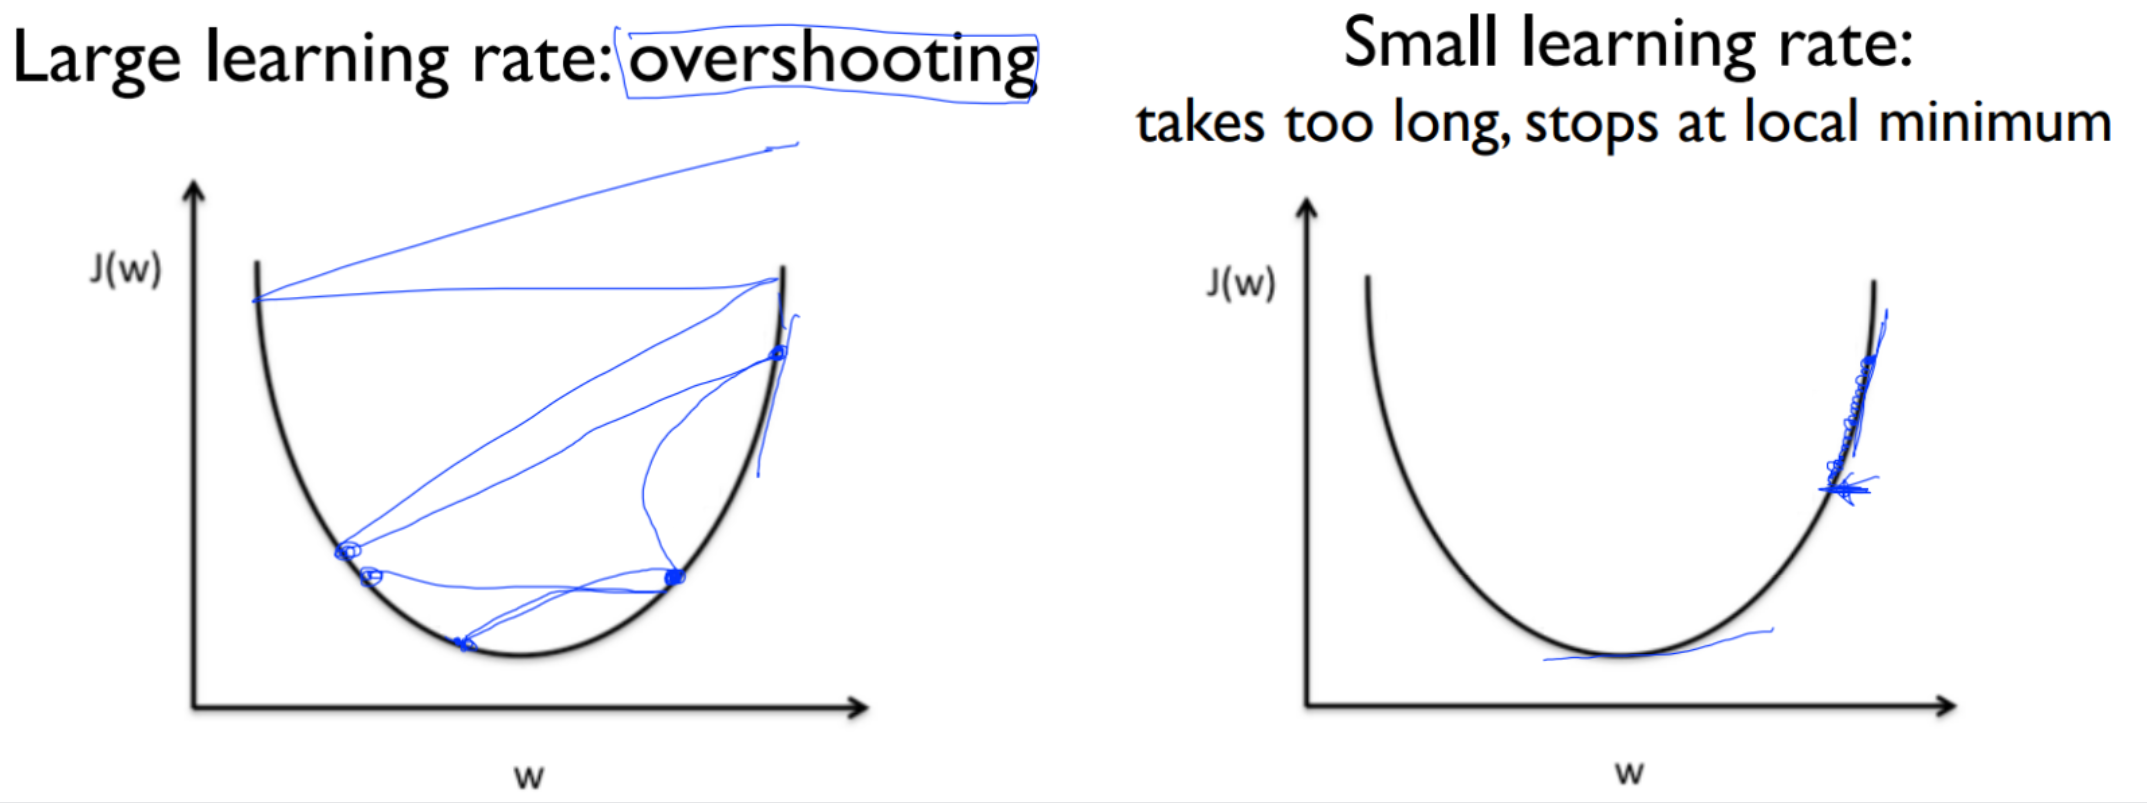

### 경사 하강 그래프에서 최소점을 찾아가는 과정
#### Learning rate는 너무 커도 안되며, 너무작아도 안된다.
#### 너무 큰 경우, 최저값에 가까워지지않고 발산하는 현상이 발생 -> OverShooting
#### 너무 작은 경우, 최저값에 가기도 전에 값을 확정하여 Local Minimum 현상이 발생 



   # 활성화 함수

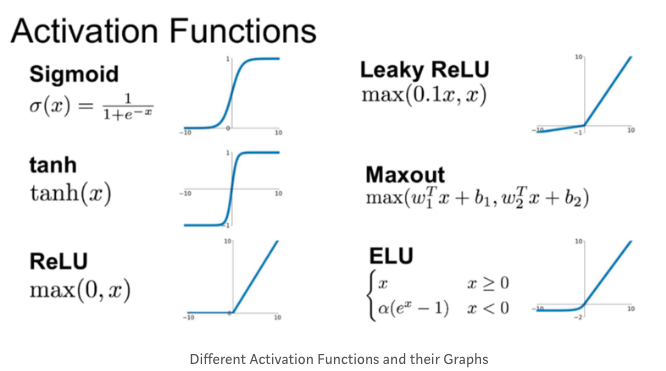

PyTorch: Tensors
NumPy는 훌륭한 프레임워크지만, GPU를 사용하여 수치 연산을 가속화할 수는 없습니다. 현대의 심층 신경망에서 GPU는 종종 50배 또는 그 이상 의 속도 향상을 제공하기 때문에, 안타깝게도 NumPy는 현대의 딥러닝에는 충분치 않습니다.

이번에는 PyTorch의 기본적인 개념인 Tensor 에 대해서 알아보겠습니다. PyTorch Tensor는 개념적으로 NumPy 배열과 동일합니다: Tensor는 N차원 배열이며, PyTorch는 Tensor 연산을 위한 다양한 함수들을 제공합니다. NumPy 배열처럼 PyTorch Tensor는 딥러닝이나 연산 그래프, 변화도는 알지 못하며, 과학적 분야의 연산을 위한 포괄적인 도구입니다.

그러나 NumPy와는 달리, PyTorch Tensor는 GPU를 활용하여 수치 연산을 가속화할 수 있습니다. GPU에서 PyTorch Tensor를 실행하기 위해서는 단지 새로운 자료형으로 변환(Cast)해주기만 하면 됩니다.

여기에서는 PyTorch Tensor를 사용하여 2계층의 신경망이 무작위 데이터를 맞추도록 할 것입니다. 위의 NumPy 예제에서와 같이 신경망의 순전파 단계와 역전파 단계는 직접 구현하겠습니다.


In [94]:
import torch


dtype = torch.float
#device = torch.device("cpu")
device = torch.device("cpu:0") # GPU에서 실행하려면 이 주석을 제거하세요.

# N은 배치 크기이며, D_in은 입력의 차원입니다;
# H는 은닉층의 차원이며, D_out은 출력 차원입니다.
N, D_in, H, D_out = 1,1000,100,5

# 무작위의 입력과 출력 데이터를 생성합니다.
x = torch.randn(N, D_in, device=device, dtype=dtype)   
y = torch.randn(N, D_out, device=device, dtype=dtype)   
print(y)
# 무작위로 가중치를 초기화합니다.
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # 순전파 단계: 예측값 y를 계산합니다.
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    
    # 손실(loss)을 계산하고 출력합니다.
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t,"번째 학습결과 : ", loss)

    # 손실에 따른 w1, w2의 변화도를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # 경사하강법(gradient descent)를 사용하여 가중치를 갱신합니다.
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
print(y_pred)

tensor([[ 1.6360, -1.1319,  1.8359, -0.1210,  2.0051]])
99 번째 학습결과 :  4.633356098793229e-08
199 번째 학습결과 :  7.71186670078805e-09
299 번째 학습결과 :  4.634591377339348e-09
399 번째 학습결과 :  3.792399283497616e-09
499 번째 학습결과 :  3.0666227335274243e-09
tensor([[ 1.6360, -1.1319,  1.8359, -0.1209,  2.0052]])


In [4]:
torch.cuda.current_device()

0

In [3]:
torch.cuda.device(0)

In [5]:
torch.cuda.get_device_name(0)

'GeForce GTX 870M'

In [14]:
import torch

dtype = torch.float
device = torch.device("cpu")

N,D_in,H,D_out = 64 ,1000,100,10 

# N = 배치 크기
# D_in = 입력의 차원\
# H = 은닉층 차원
# D_out = 출력 차원


#평균 0, 표준편차 1 가우시안 분포를 가진 수로 초기화
x =torch.randn(N,D_in,device=device,dtype=dtype)           #(64*1000)
y =torch.randn(N,D_out,device=device,dtype=dtype)          #(64*10)

w1 = torch.randn(D_in, H, device = device , dtype=dtype)   #(1000*100)
w2 = torch.randn(H, D_out, device = device , dtype=dtype)  #(100*10) 

learning_rate = 1e-6


tensor([[ 2.3437, -0.2666,  0.0150,  ..., -1.9920, -1.0263, -0.6800],
        [ 0.3079,  1.8563,  1.5327,  ...,  0.7905, -1.7094, -0.0738],
        [-1.4092,  0.8262, -0.3790,  ...,  1.9168, -0.3729, -0.1167],
        ...,
        [-0.8919,  0.9706,  1.7785,  ...,  0.9409,  1.4534, -0.1190],
        [-0.3809,  0.7124,  2.4656,  ...,  0.0922,  0.8310,  0.9556],
        [ 0.2583, -0.1784,  0.0622,  ...,  0.0322,  1.6150, -0.6865]])


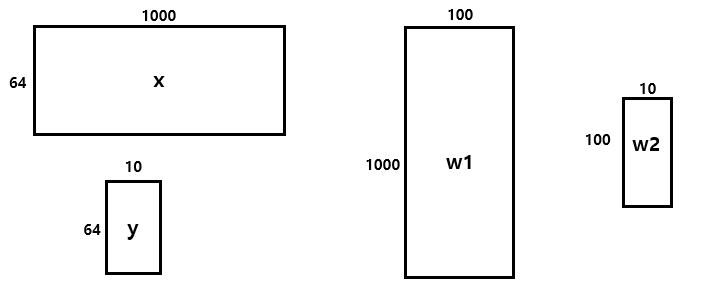

In [4]:
h= x.mm(w1)      #  mm() matrix multiple  = x * w1  matmul()과 동일
# h = (64*1000) * (1000*100) => (64*100)
h_relu = h.clamp(min=0)  # Relu 구현 .clamp() 메소드는 괄호파라미터에 맞춰 값을 변경 0이하의 값 0으로 다시 초기화

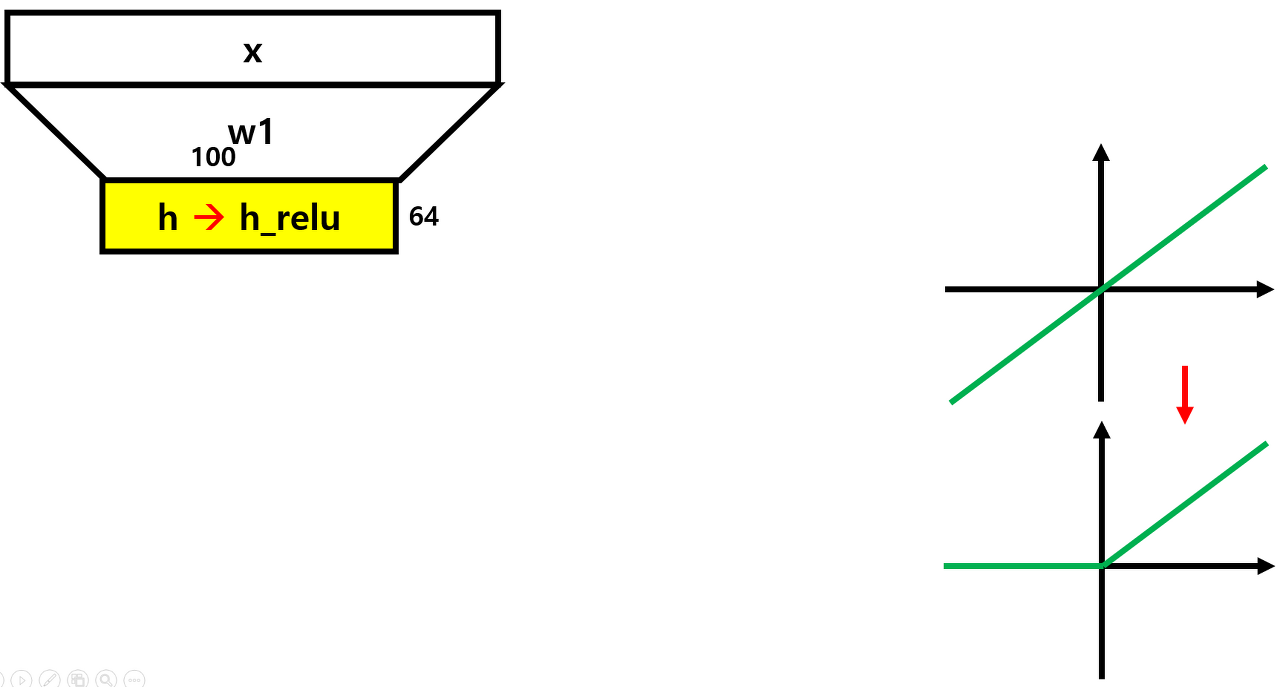

In [7]:
y_pred = h_relu.mm(w2) # h_relu 값에 가중치 w2 를 곱하여 y의 예측값 생성

print(y_pred.shape)

torch.Size([64, 10])


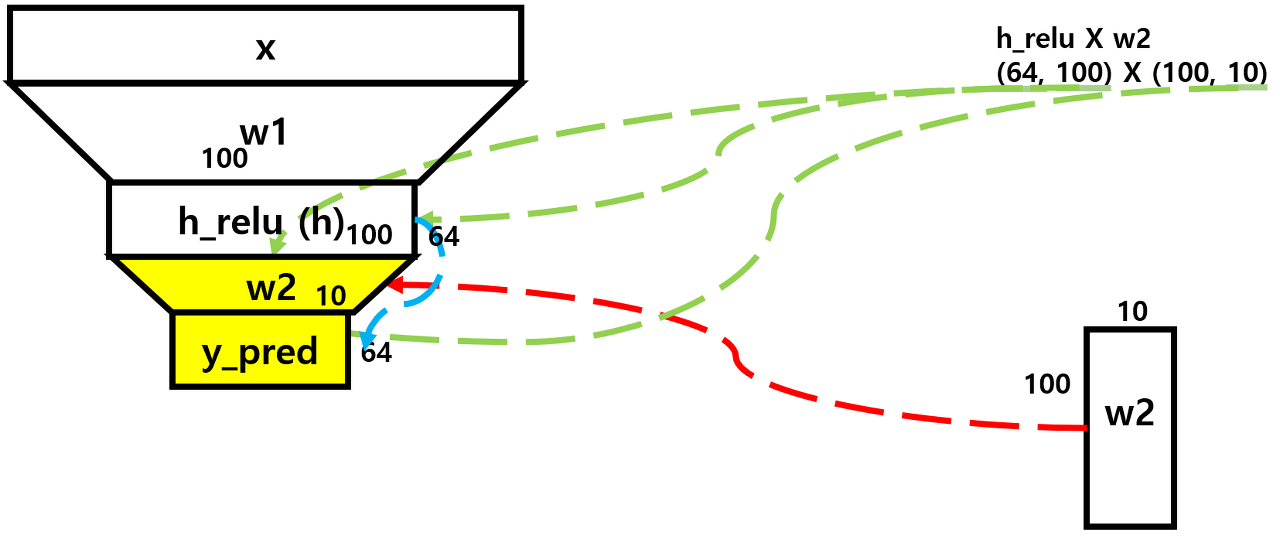

35009480.0


TypeError: Invalid shape () for image data

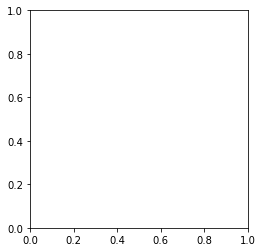

In [13]:
loss =(y_pred -y).pow(2).sum().item() # pow() 제곱 함수

print(loss)


tensor([[ -311.4641,   824.6873,  -398.8721,  -319.4742,   398.2972,  -688.1832,
         -1162.0281,  -845.3167,   644.2305,  -385.1569],
        [  599.7085,   820.5861,  -338.8792,   165.4075,  -268.6933,  -580.9854,
          -380.5841,   -26.1138,  -278.5353,   529.4077],
        [  -34.9327,  1092.6846,  -554.1207, -1014.4862,  -603.7401, -1282.6907,
          -367.1334,  -570.6736,   383.9638,   374.6425],
        [ -654.4865,   683.8218,  -123.8636,   541.5659,    38.2177,   -22.7496,
           -31.6434, -1193.2363,  -118.5248,  -200.1717],
        [  207.6733,    83.0544,   531.5177,   570.6451,   351.5237,     3.6861,
           295.8637,  -639.9815,   240.2196,  -254.7258],
        [  682.0220,   603.1664,  -173.0242,   220.1721,   112.0344,  -330.1672,
          -935.1827,  -392.1171,  -391.9072,  -171.6830],
        [ -211.5726,   832.6058,  -968.4891,  -110.2506,   440.2803,  -789.6492,
          -692.4731,   -86.0979,  -434.0542,  -396.2289],
        [ -814.7314,  1144.

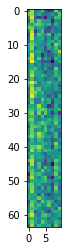

In [11]:
grad_y_pred = 2.0 * (y_pred - y)

print(grad_y_pred)


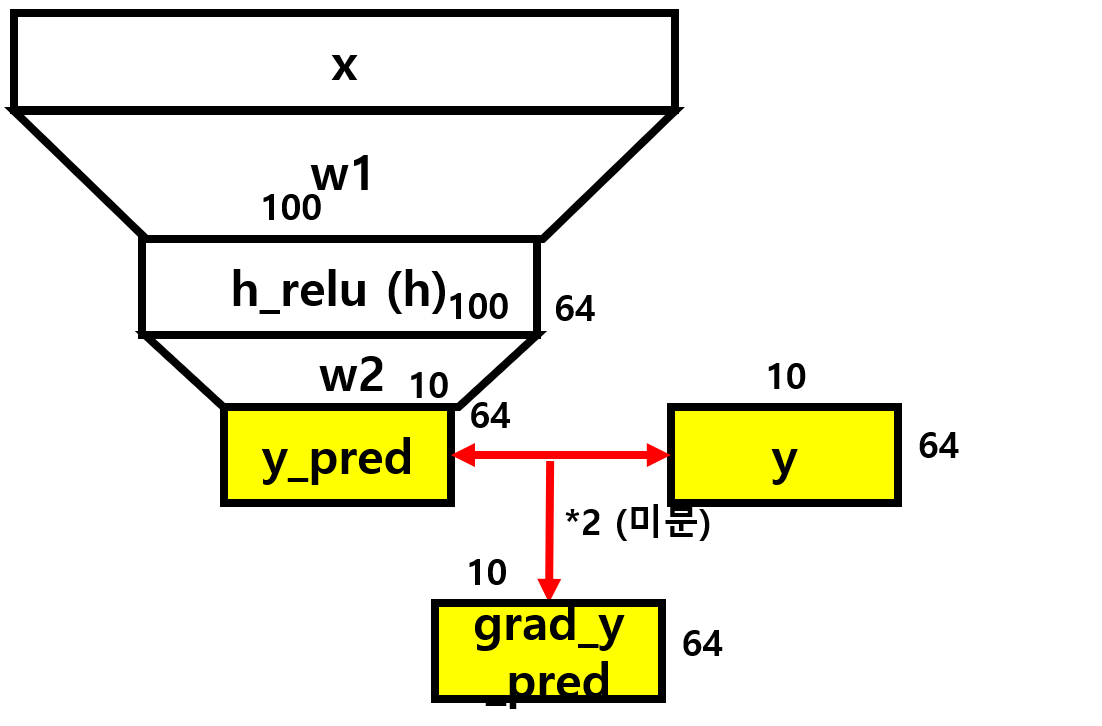

## w2 가중치 구현

In [66]:
grad_w2 = h_relu.t().mm(grad_y_pred)

# h_relu의 값을 전치행렬로 변환하여 예측한 y의값을 곱하여 w2 가중치 구현


torch.Size([64, 100])
torch.Size([100, 64])


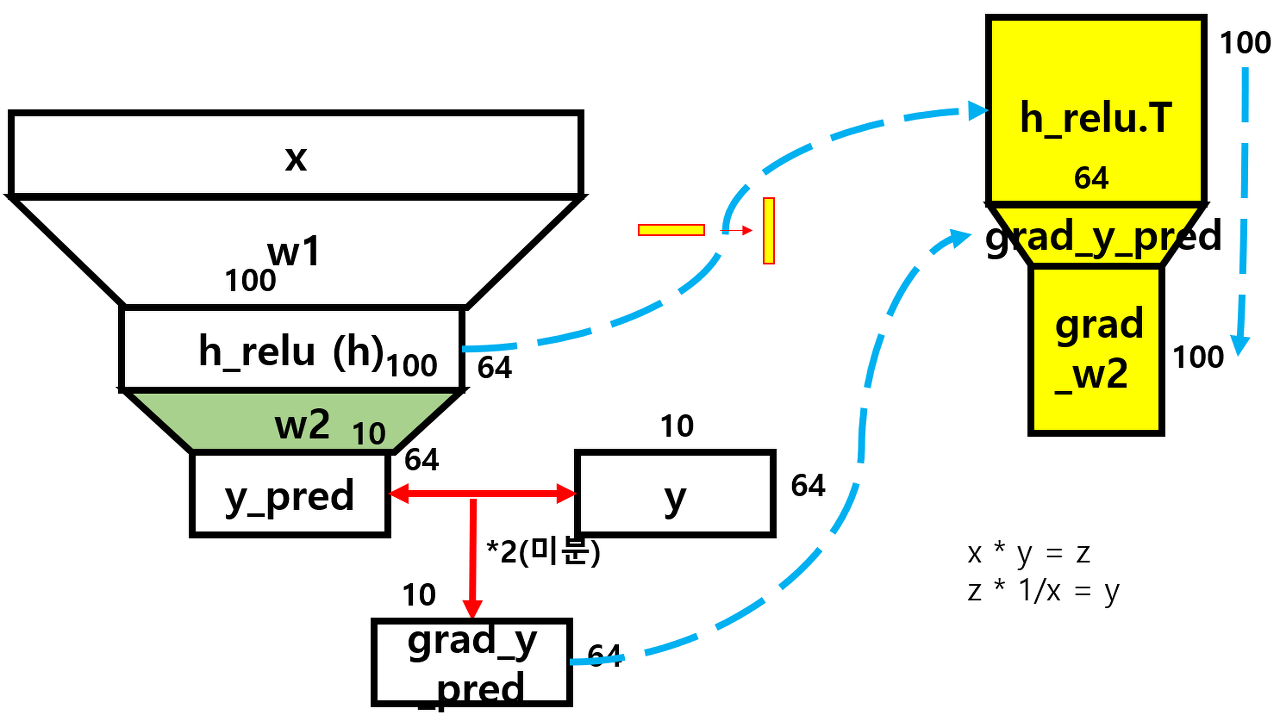

## h layer의  가중치 구현

In [67]:
grad_h_relu = grad_y_pred.mm(w2.t())

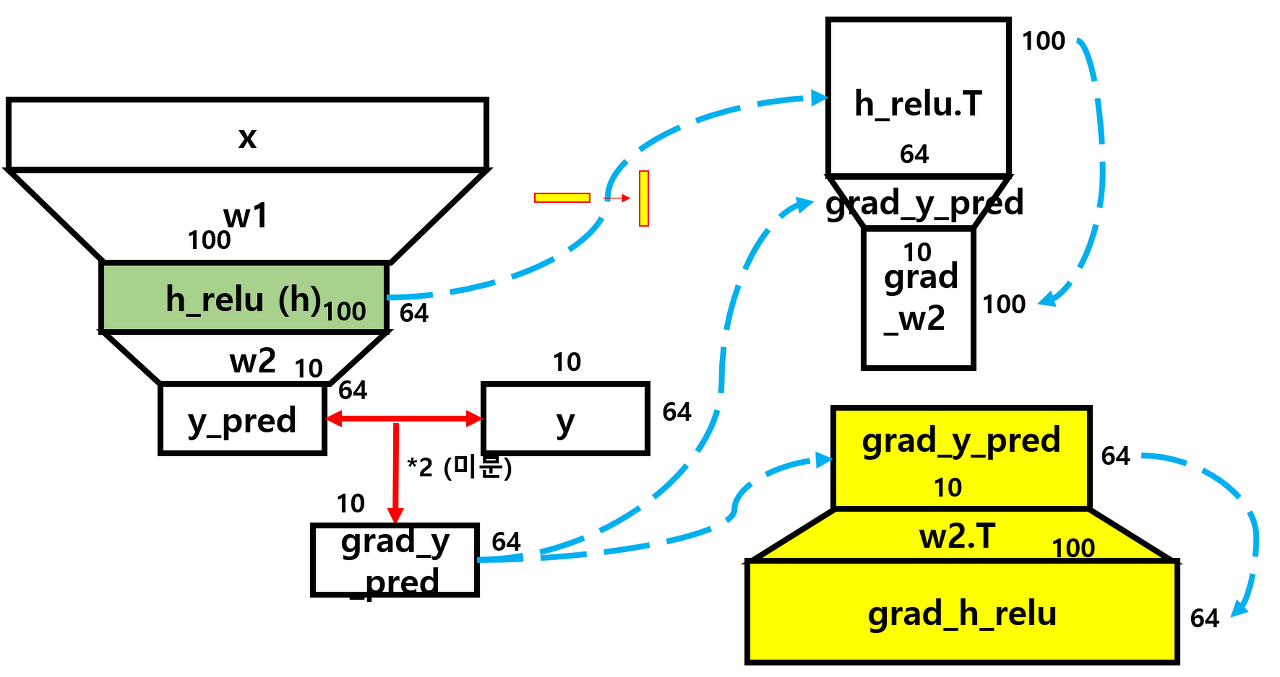

## ReLU 구현

In [68]:
grad_h = grad_h_relu.clone() 
grad_h[h < 0] = 0
# - 처음의 h 부분에서 0 이하의 수가 있던 위치를 구하여 0으로 반환시켰다.

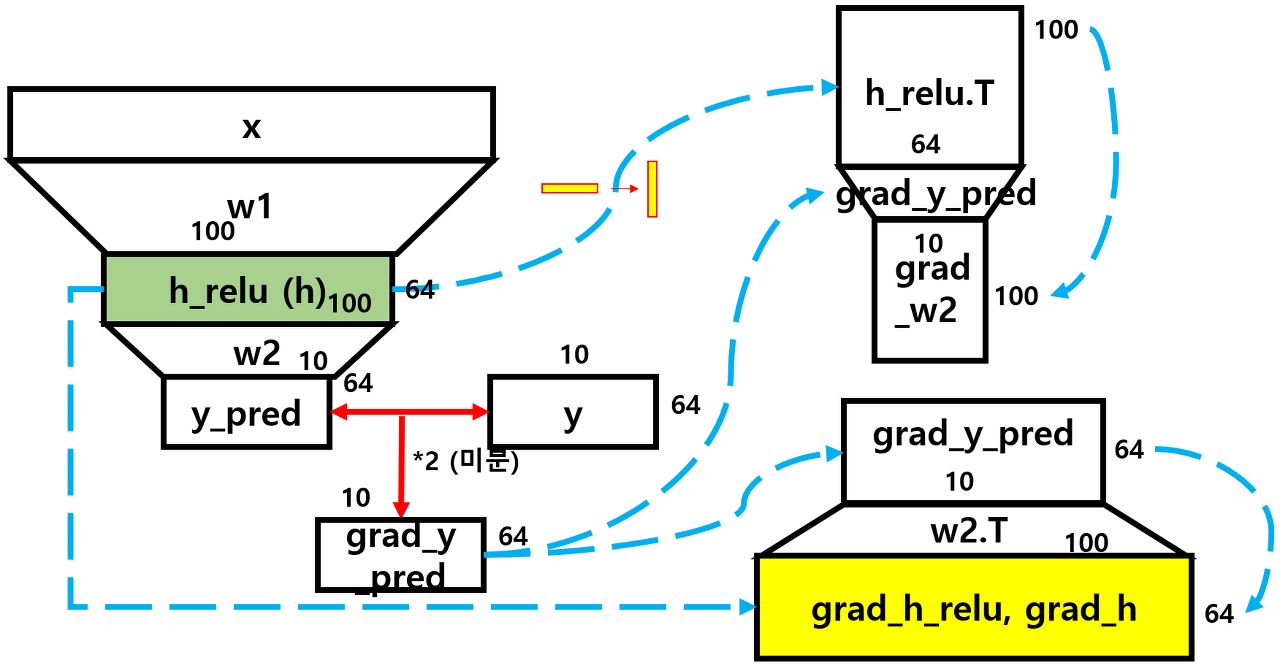

## w1의 가중치 구현

In [69]:
grad_w1 = x.t().mm(grad_h)

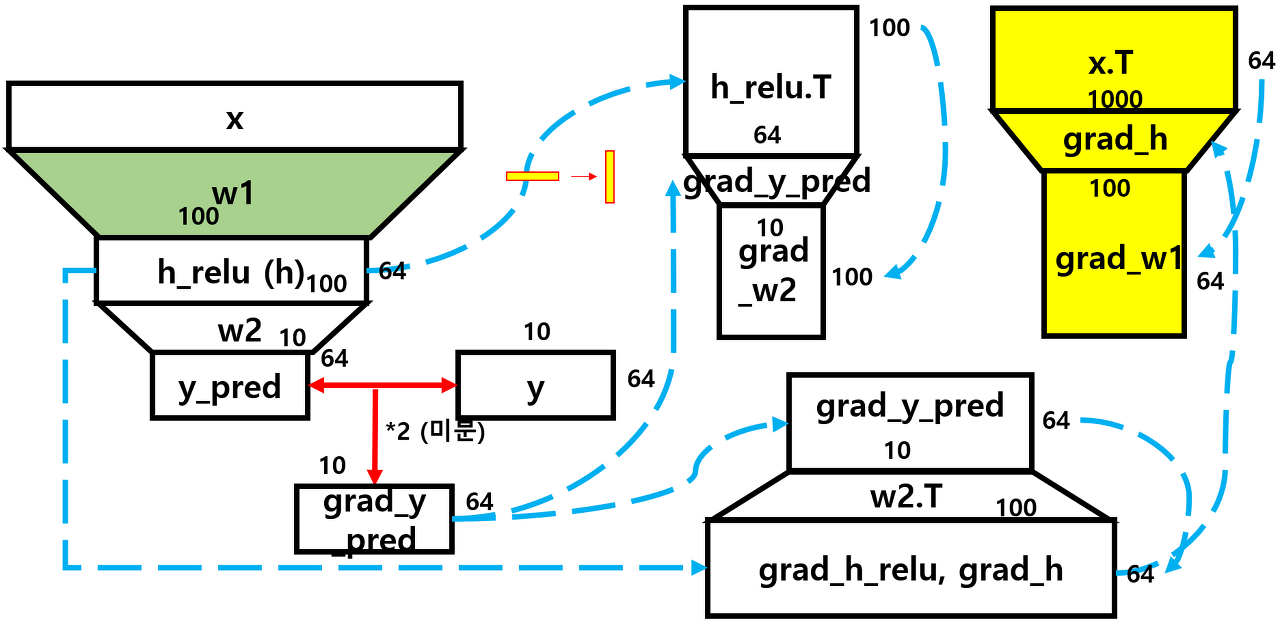

## weight 갱신

In [38]:
w1 -= learning_rate * grad_w1
w2 -= learning_rate * grad_w2
# 처음에 지정한 learning rate를 w1, w2의 가중치에 곱해준 뒤 w1, w2에서 제하였다.

# 부호가 -인 이유는 loss를 감소시키는 방향으로 진행되어야 하기 때문이다.

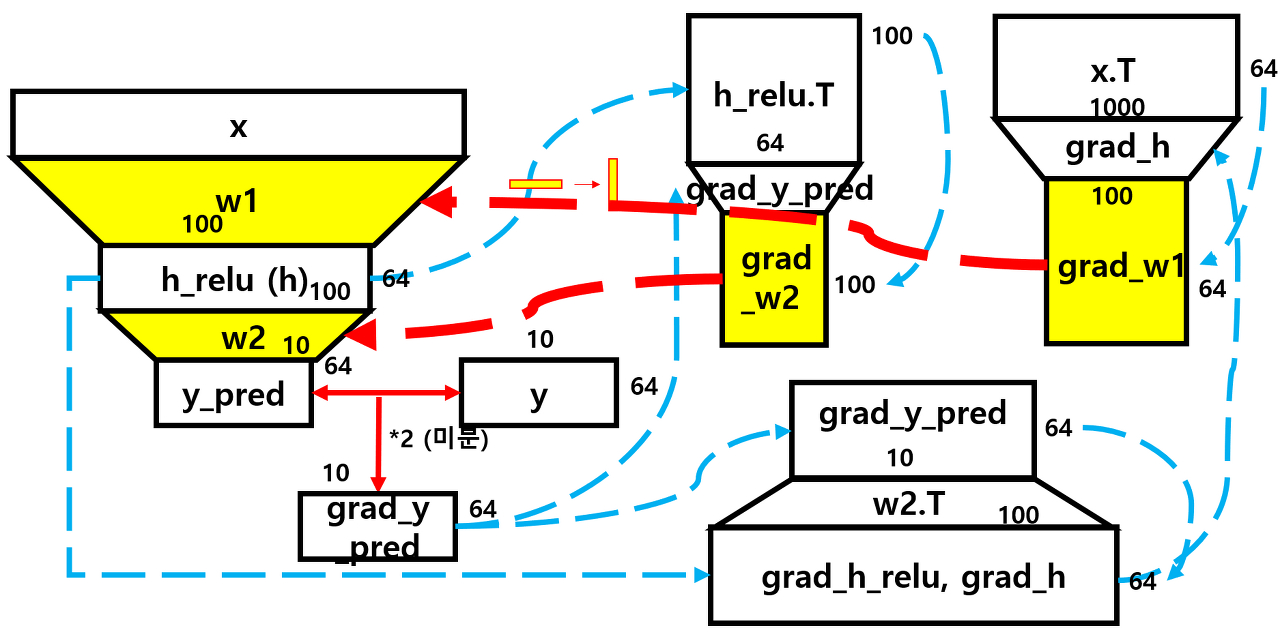

In [39]:
print(w1)
print(w1)

tensor([[-1.2637, -1.3518, -0.4090,  ...,  1.3705, -0.9176, -2.4547],
        [-0.1293, -1.1505, -0.4713,  ...,  0.7086,  0.4912, -0.0106],
        [ 0.0377, -1.4680, -0.5666,  ...,  0.1435,  0.4030,  2.0523],
        ...,
        [ 0.1476, -1.1028,  0.9612,  ..., -1.1382,  0.0423,  1.4626],
        [ 0.4726,  1.0323, -1.3779,  ...,  0.2149, -0.5539,  0.0235],
        [ 0.4146,  0.3210,  1.0878,  ...,  0.0158, -0.3656,  0.5798]])
tensor([[-1.2637, -1.3518, -0.4090,  ...,  1.3705, -0.9176, -2.4547],
        [-0.1293, -1.1505, -0.4713,  ...,  0.7086,  0.4912, -0.0106],
        [ 0.0377, -1.4680, -0.5666,  ...,  0.1435,  0.4030,  2.0523],
        ...,
        [ 0.1476, -1.1028,  0.9612,  ..., -1.1382,  0.0423,  1.4626],
        [ 0.4726,  1.0323, -1.3779,  ...,  0.2149, -0.5539,  0.0235],
        [ 0.4146,  0.3210,  1.0878,  ...,  0.0158, -0.3656,  0.5798]])
